# Descubra quem fez o ENEM 2016 apenas para treino

In [12]:
# !pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git



In [13]:
# #!conda install -c glemaitre imbalanced-learn
# !pip install -U imbalanced-learn

In [14]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


In [15]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

pd.options.display.max_columns = None

In [16]:
df.head()

Unnamed: 0                              NU_INSCRICAO  NU_ANO  \
0           1  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad    2016   
1           2  2c3acac4b33ec2b195d77e7c04a2d75727fad723    2016   
2           3  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568    2016   
3           4  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe    2016   
4           5  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268    2016   

   CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  \
0                  4314902            Porto Alegre                43   
1                  2304707                  Granja                23   
2                  2304400               Fortaleza                23   
3                  3304557          Rio de Janeiro                33   
4                  1302603                  Manaus                13   

  SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               RS        24       M              0.0            1   
1               CE        17       F              0.0            3   
2               CE        21       F              0.0            3   
3               RJ        25       F              0.0            0   
4               AM        28       M              0.0            2   

   TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO NO_MUNICIPIO_NASCIMENTO  \
0                 1                4314902.0            Porto Alegre   
1                 1                2304707.0                  Granja   
2                 1                2304400.0               Fortaleza   
3                 1                3304557.0          Rio de Janeiro   
4                 1                1505304.0               Oriximiná   

   CO_UF_NASCIMENTO SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0              43.0               RS                1                4   
1              23.0               CE                2                0   
2              23.0               CE                3                0   
3              33.0               RJ                1                9   
4              15.0               PA                1                4   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO   CO_ESCOLA  CO_MUNICIPIO_ESC  \
0          1        NaN             0         NaN               NaN   
1          2        1.0             0  23005157.0         2304707.0   
2          1        NaN             0         NaN               NaN   
3          1        NaN             0         NaN               NaN   
4          1        NaN             0         NaN               NaN   

  NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0              NaN        NaN       NaN                     NaN   
1           Granja       23.0        CE                     2.0   
2              NaN        NaN       NaN                     NaN   
3              NaN        NaN       NaN                     NaN   
4              NaN        NaN       NaN                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 1.0              1.0               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0             

In [17]:
df.shape

(13730, 167)

In [18]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.drop(columns='NU_INSCRICAO',axis=1,inplace=True)
df.drop(columns='NU_ANO',axis=1,inplace=True)
df.drop(columns='CO_MUNICIPIO_RESIDENCIA',axis=1,inplace=True)


In [19]:

faltantes = pd.DataFrame({'colunas':df.columns, 
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':df.isna().sum()/df.shape[0],
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes[faltantes['Qtde valores NaN']>0]

index                      colunas     tipo  \
5                TP_ESTADO_CIVIL              TP_ESTADO_CIVIL  float64   
8        CO_MUNICIPIO_NASCIMENTO      CO_MUNICIPIO_NASCIMENTO  float64   
9        NO_MUNICIPIO_NASCIMENTO      NO_MUNICIPIO_NASCIMENTO   object   
10              CO_UF_NASCIMENTO             CO_UF_NASCIMENTO  float64   
11              SG_UF_NASCIMENTO             SG_UF_NASCIMENTO   object   
15                     TP_ENSINO                    TP_ENSINO  float64   
17                     CO_ESCOLA                    CO_ESCOLA  float64   
18              CO_MUNICIPIO_ESC             CO_MUNICIPIO_ESC  float64   
19              NO_MUNICIPIO_ESC             NO_MUNICIPIO_ESC   object   
20                     CO_UF_ESC                    CO_UF_ESC  float64   
21                     SG_UF_ESC                    SG_UF_ESC   object   
22        TP_DEPENDENCIA_ADM_ESC       TP_DEPENDENCIA_ADM_ESC  float64   
23            TP_LOCALIZACAO_ESC           TP_LOCALIZACAO_ESC  float64   
24               TP_SIT_FUNC_ESC              TP_SIT_FUNC_ESC  float64   
78      NO_ENTIDADE_CERTIFICACAO     NO_ENTIDADE_CERTIFICACAO   object   
79   CO_UF_ENTIDADE_CERTIFICACAO  CO_UF_ENTIDADE_CERTIFICACAO  float64   
80   SG_UF_ENTIDADE_CERTIFICACAO  SG_UF_ENTIDADE_CERTIFICACAO   object   
93                    NU_NOTA_CN                   NU_NOTA_CN  float64   
94                    NU_NOTA_CH                   NU_NOTA_CH  float64   
95                    NU_NOTA_LC                   NU_NOTA_LC  float64   
96                    NU_NOTA_MT                   NU_NOTA_MT  float64   
97               TX_RESPOSTAS_CN              TX_RESPOSTAS_CN   object   
98               TX_RESPOSTAS_CH              TX_RESPOSTAS_CH   object   
99               TX_RESPOSTAS_LC              TX_RESPOSTAS_LC   object   
100              TX_RESPOSTAS_MT              TX_RESPOSTAS_MT   object   
102               TX_GABARITO_CN               TX_GABARITO_CN   object   
103               TX_GABARITO_CH               TX_GABARITO_CH   object   
104               TX_GABARITO_LC               TX_GABARITO_LC   object   
105               TX_GABARITO_MT               TX_GABARITO_MT   object   
106            TP_STATUS_REDACAO            TP_STATUS_REDACAO  float64   
107                NU_NOTA_COMP1                NU_NOTA_COMP1  float64   
108                NU_NOTA_COMP2                NU_NOTA_COMP2  float64   
109                NU_NOTA_COMP3                NU_NOTA_COMP3  float64   
110                NU_NOTA_COMP4                NU_NOTA_COMP4  float64   
111                NU_NOTA_COMP5                NU_NOTA_COMP5  float64   
112              NU_NOTA_REDACAO              NU_NOTA_REDACAO  float64   
139                         Q027                         Q027   object   
140                         Q028                         Q028   object   
141                         Q029                         Q029  float64   
142                         Q030                         Q030  float64   
143                         Q031                         Q031  float64   
144                         Q032                         Q032  float64   
145                         Q033                         Q033  float64   
153                         Q041                         Q041  float64   

     Qtde valores NaN  % valores NaN  valores únicos por feature  
5                 528       0.038456                           4  
8                 609       0.044355                        2403  
9                 609       0.044355                        2343  
10                609       0.044355                          27  
11                609       0.044355                          27  
15               9448       0.688128                           3  
17               9448       0.688128                        3333  
18               9448       0.688128                        1502  
19               9448       0.688128                        1475  
20               9448     

In [20]:
df['TP_ENSINO'].fillna(df['TP_ENSINO'].mode(),inplace=True)
df.fillna(value=0,inplace=True)

In [22]:
df.TP_ESTADO_CIVIL = df.TP_ESTADO_CIVIL.astype(int)
df.TP_ENSINO = df.TP_ENSINO.astype(int)
df.CO_ESCOLA = df.CO_ESCOLA.astype(object)
df.CO_UF_ESC = df.CO_UF_ESC.astype(object)
df.CO_MUNICIPIO_NASCIMENTO = df.CO_MUNICIPIO_NASCIMENTO.astype(object)
df.CO_UF_NASCIMENTO = df.CO_UF_NASCIMENTO.astype(object)
df.CO_UF_ENTIDADE_CERTIFICACAO = df.CO_UF_ENTIDADE_CERTIFICACAO.astype(object)
df.TP_STATUS_REDACAO = df.TP_STATUS_REDACAO.astype(int)
df.TP_DEPENDENCIA_ADM_ESC = df.TP_DEPENDENCIA_ADM_ESC.astype(int)
df.TP_LOCALIZACAO_ESC = df.TP_LOCALIZACAO_ESC.astype(int)
df.TP_SIT_FUNC_ESC = df.TP_SIT_FUNC_ESC.astype(int)



Text(0.5, 1.0, 'Pesssoas treineiras')

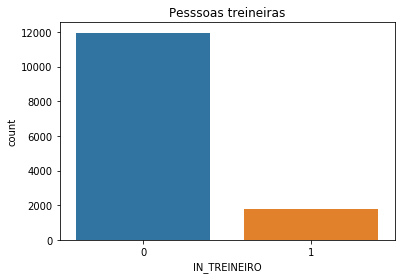

In [23]:
sns.countplot(df['IN_TREINEIRO'])
plt.title('Pesssoas treineiras')

1- Sim

0- Não

In [24]:
df['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

Temos classes desbalanceadas na nossa variável target, ao meu ver não faz sentido remover dados com valores 0, e sim precisaríamos trazer mais dados com valor 1.




In [25]:
df_test.head()

NU_INSCRICAO  CO_UF_RESIDENCIA  \
0  ba0cc30ba34e7a46764c09dfc38ed83d15828897                43   
1  177f281c68fa032aedbd842a745da68490926cd2                15   
2  6cf0d8b97597d7625cdedc7bdb6c0f052286c334                29   
3  5c356d810fa57671402502cd0933e5601a2ebf1e                41   
4  df47c07bd881c2db3f38c6048bf77c132ad0ceb3                53   

  SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  TP_NACIONALIDADE  \
0               RS        19       F            1                 1   
1               PA        24       M            3                 2   
2               BA        16       F            2                 1   
3               PR        17       F            1                 1   
4               DF        19       F            1                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  \
0                1                3          1        NaN   
1                1                4          1        NaN   
2                3                0          1        NaN   
3                2                0          2        1.0   
4                1                1          1        NaN   

   TP_DEPENDENCIA_ADM_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  \
0                     NaN               0            0          0   
1                     NaN               0            0          0   
2                     NaN               0            0          0   
3                     2.0               0            0          0   
4                     NaN               0            0          0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_SABATISTA  IN_GESTANTE  IN_IDOSO  \
0            0               0             0            0         0   
1            0               0             0            0         0   
2            0               0             0            0         0   
3            0               0             0            0         0   
4            0               0             0            0         0   

   TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  \
0               1               1               0               0       495.3   
1               0               0               0               0         NaN   
2               1               1               0               0       559.1   
3               1               1               1               1       475.0   
4               1               1               1               1       440.5   

   NU_NOTA_CH  NU_NOTA_LC  TP_LINGUA  TP_STATUS_REDACAO  NU_NOTA_COMP1  \
0       593.3         NaN          1                NaN            NaN   
1         NaN         NaN          1                NaN            NaN   
2       529.3         NaN          0                NaN            NaN   
3       557.8       542.0          1                1.0          120.0   
4       596.1       594.2          1                1.0          160.0   

   NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
0            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN   
3          120.0           80.0          120.0           40.0   
4          160.0          160.0          160.0           80.0   

   NU_NOTA_REDACAO Q001 Q002 Q006 Q024 Q025 Q026 Q027 Q047  
0              NaN    E    E    H    B    B    C    D    A  
1              NaN    B    C    B    A    A    C    D    A  
2              NaN    E    F    G    B    B    A  NaN    D  
3            480.0    E    E    E    C    B    B    C    A  
4            720.0    E    E    E    B    B    B    D    A

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 163 entries, NO_MUNICIPIO_RESIDENCIA to Q050
dtypes: float64(17), int64(82), object(64)
memory usage: 17.1+ MB


In [27]:
df[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].describe().round(2)

NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  \
count       13730.00       13730.00       13730.00       13730.00   
mean           88.42          82.60          78.84          83.49   
std            58.59          57.11          55.47          57.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%           120.00         100.00         100.00         100.00   
75%           120.00         120.00         120.00         120.00   
max           200.00         200.00         200.00         200.00   

       NU_NOTA_COMP5  NU_NOTA_REDACAO  NU_NOTA_MT  NU_NOTA_CN  NU_NOTA_CH  \
count       13730.00         13730.00    13730.00    13730.00    13730.00   
mean           57.10           390.45      356.09      356.62      398.92   
std            50.26           267.75      228.84      213.28      237.17   
min             0.00             0.00        0.00        0.00        0.00   
25%             0.00             0.00        0.00      365.63      345.90   
50%            60.00           480.00      422.50      433.10      499.60   
75%           100.00           580.00      504.40      493.20      564.40   
max           200.00          1000.00      952.00      806.40      807.00   

       NU_NOTA_LC  
count    13730.00  
mean       381.17  
std        234.65  
min          0.00  
25%          0.00  
50%        486.00  
75%        548.30  
max        763.60

Text(0.5, 1.0, 'Estados de residência dos participantes de 2016')

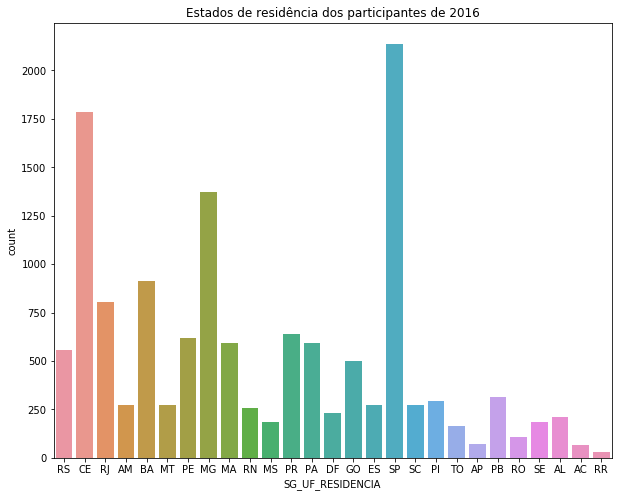

In [28]:
plt.rc('figure', figsize = (10,8))
sns.countplot(df['SG_UF_RESIDENCIA'])
plt.title('Estados de residência dos participantes de 2016')

Text(0.5, 1.0, 'Estado civil dos participantes de 2016')

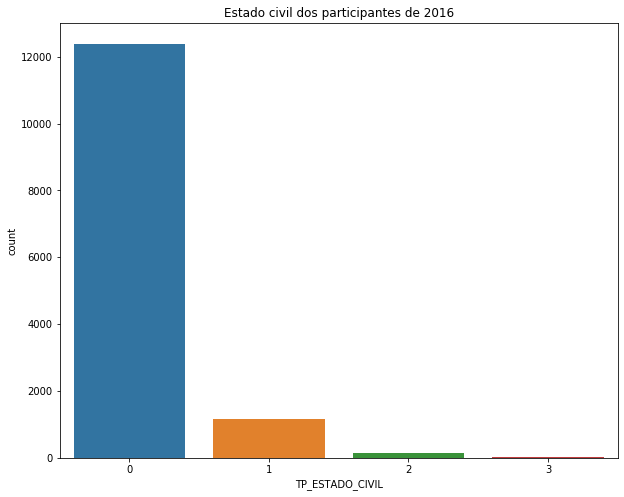

In [29]:
sns.countplot(df['TP_ESTADO_CIVIL'])
plt.title('Estado civil dos participantes de 2016')

0- Solteiro(a)
1- Casado(a)/Mora com companheiro(a)
2- Divorciado(a)/Desquitado(a)/Separado(a)
3- Viúvo(a)

Text(0.5, 1.0, 'Gênero dos participantes de 2016')

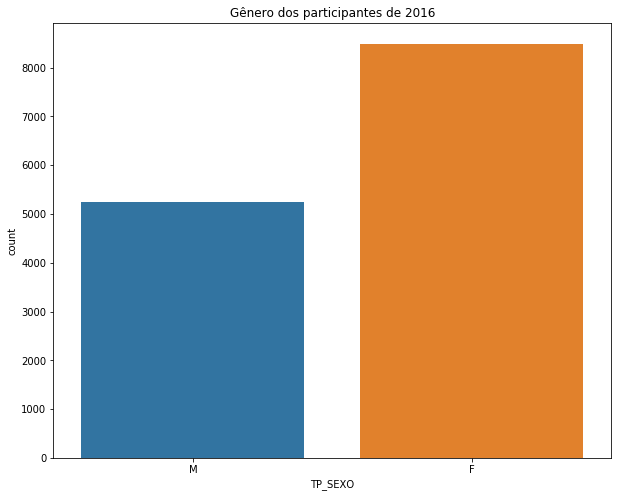

In [30]:
sns.countplot(df['TP_SEXO'])
plt.title('Gênero dos participantes de 2016')

Text(0.5, 1.0, 'Tipo de escola que os participantes de 2016')

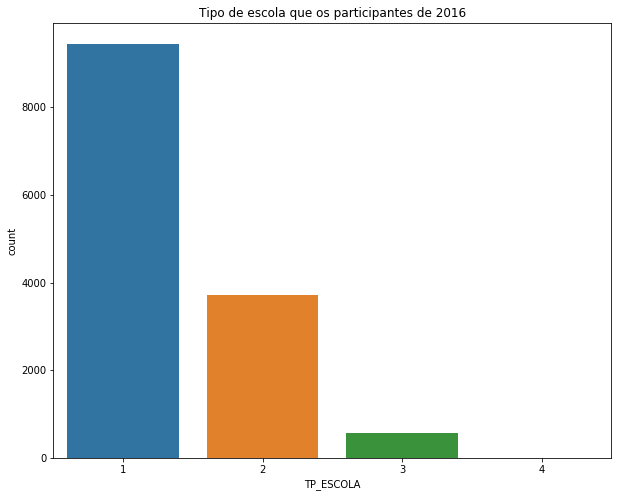

In [31]:
sns.countplot(df['TP_ESCOLA'])
plt.title('Tipo de escola que os participantes de 2016')

Text(0.5, 1.0, 'Idade dos participantes de 2016')

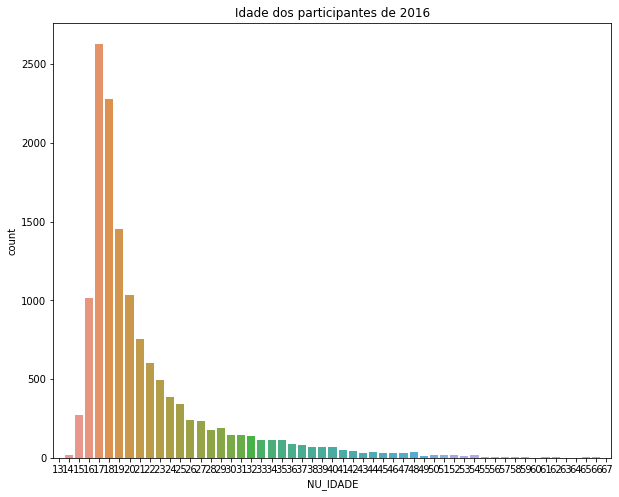

In [32]:
sns.countplot(df['NU_IDADE'])
plt.title('Idade dos participantes de 2016')

Podemos notar através desses gráficos que grande parte dos participantes do ENEM em 2016:
* São do gênero feminino,
* Grande parte dos participantes tem em média 17 e 18 anos
* Temos muitos participantes que não responderam a pesquisa referente a escola, e alguns vieram de escolas públicas
* Temos mais participantes de SP,CE e MG

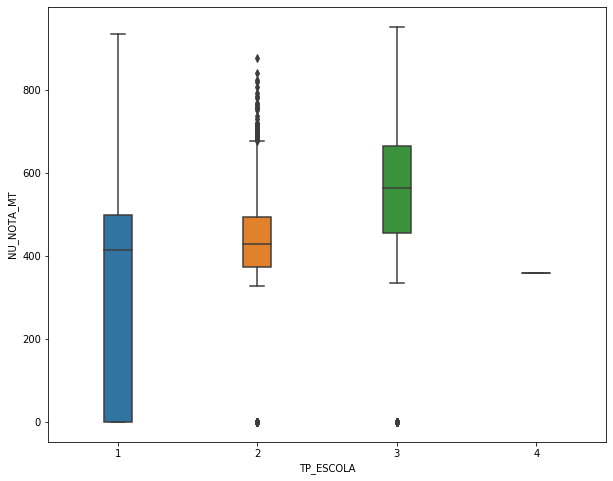

In [33]:
ax = sns.boxplot(x=df.TP_ESCOLA, y=df.NU_NOTA_MT,orient='v',width=0.2)


1- Não respoderam
2- Alunos de escola pública
3- Alunos de escolas particulares
4- Alunos de escolas do exterior

Podemos concluir que alunos de escolas particulares costumam tirar as maiores notas em nota de matemática

## Conhecer mais os treineiros

Text(0.5, 1.0, 'Gênero dos treineiros de 2016')

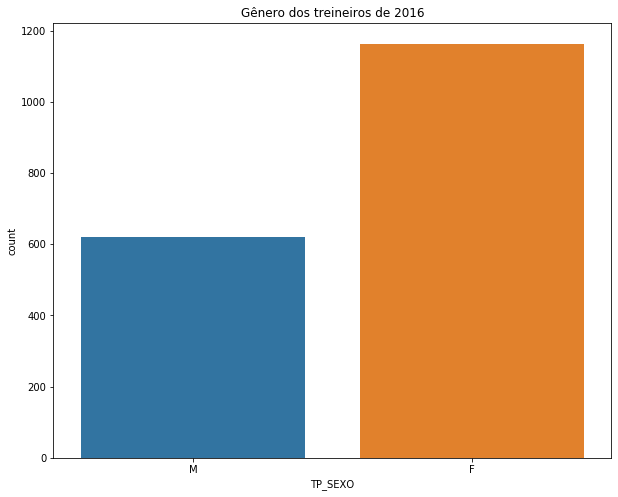

In [34]:
sns.countplot(df[df['IN_TREINEIRO']==1]['TP_SEXO'])
plt.title('Gênero dos treineiros de 2016')

Text(0.5, 1.0, 'Estados de residência dos treineiros de 2016')

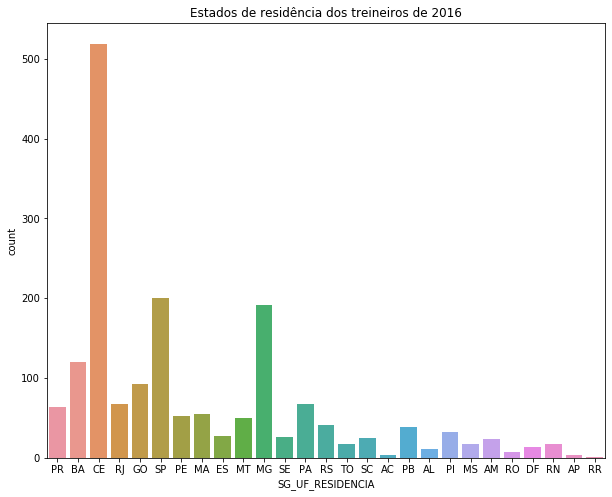

In [35]:
plt.rc('figure', figsize = (10,8))
sns.countplot(df[df['IN_TREINEIRO']==1]['SG_UF_RESIDENCIA'])
plt.title('Estados de residência dos treineiros de 2016')

Text(0.5, 1.0, 'Conclusão do Ensino médio dos treineiros de 2016')

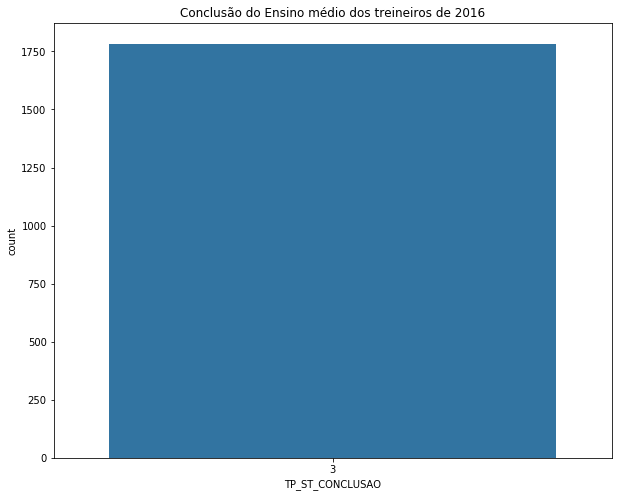

In [36]:
sns.countplot(df[df['IN_TREINEIRO']==1]['TP_ST_CONCLUSAO'])
plt.title('Conclusão do Ensino médio dos treineiros de 2016')

1- Já concluí o Ensino Médio

2- Estou cursando e concluirei o Ensino Médio em 2016

3- Estou cursando e concluirei o Ensino Médio após 2016

4- Não concluí e não estou cursando o Ensino Médio

Text(0.5, 1.0, 'Idade dos treineiros de 2016')

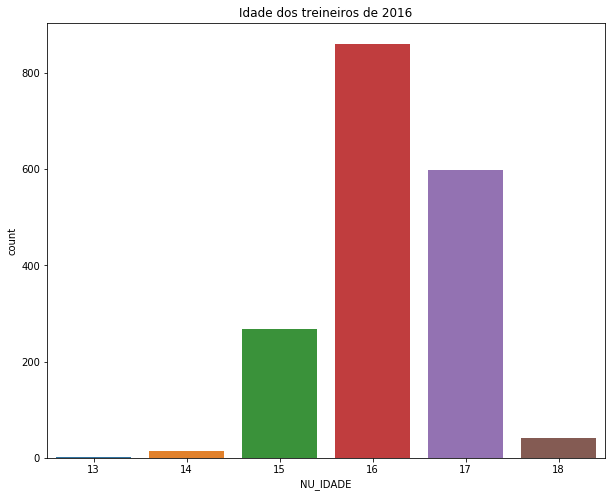

In [37]:
sns.countplot(df[df['IN_TREINEIRO']==1]['NU_IDADE'])
plt.title('Idade dos treineiros de 2016')

Text(0.5, 1.0, 'Estado civil dos participantes de 2016')

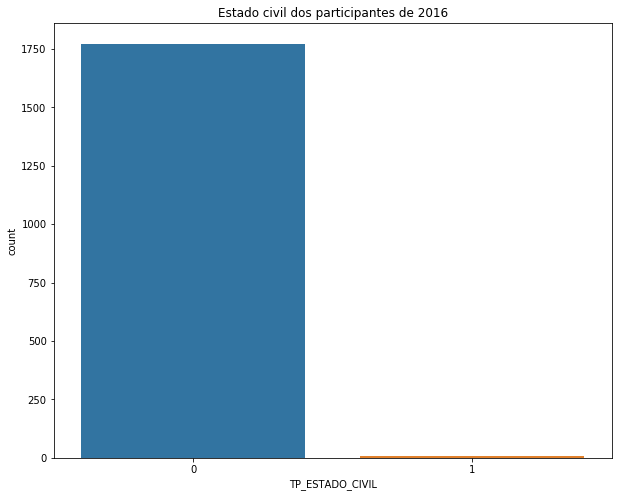

In [38]:
sns.countplot(df[df['IN_TREINEIRO']==1]['TP_ESTADO_CIVIL'])
plt.title('Estado civil dos participantes de 2016')

Text(0.5, 1.0, 'Lingua estrangeira escolhidas pelos treineiros de 2016')

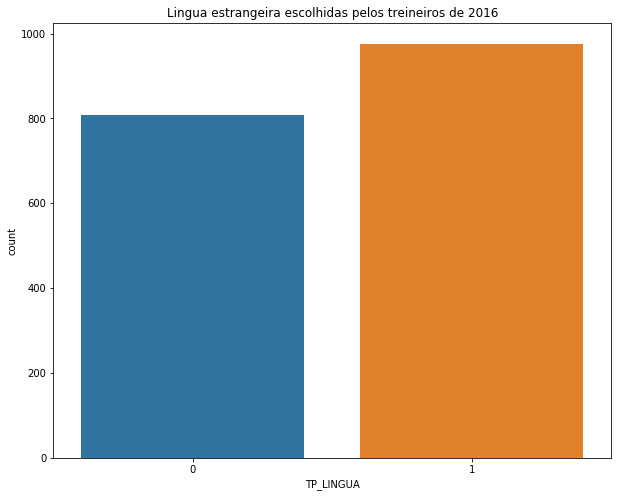

In [39]:
sns.countplot(df[df['IN_TREINEIRO']==1]['TP_LINGUA'])
plt.title('Lingua estrangeira escolhidas pelos treineiros de 2016')

0- Inglês
1- Espanhol

Text(0.5, 1.0, 'Tipo da escola que os treineiros de 2016 frequentam')

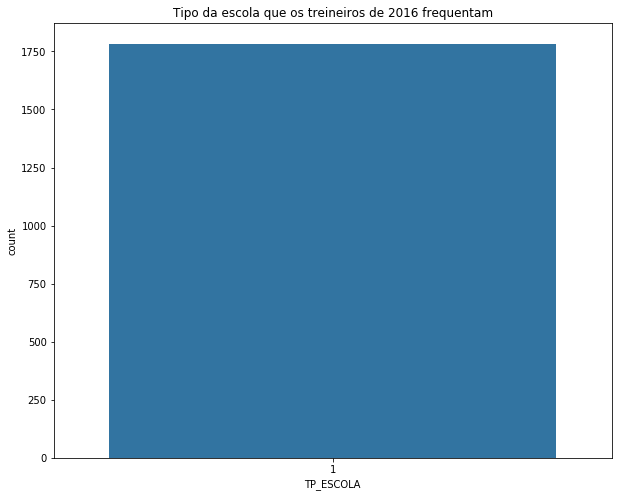

In [40]:
sns.countplot(df[df['IN_TREINEIRO']==1]['TP_ESCOLA'])
plt.title('Tipo da escola que os treineiros de 2016 frequentam')

Todos os treineiros não responderam o tipo da escola

Text(0.5, 1.0, 'Nota de matemática dos treineiros de 2016')

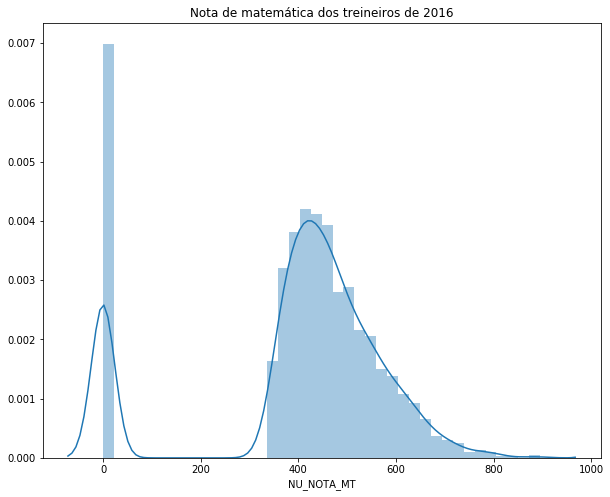

In [41]:
sns.distplot(df[df['IN_TREINEIRO']==1]['NU_NOTA_MT'])
plt.title('Nota de matemática dos treineiros de 2016')

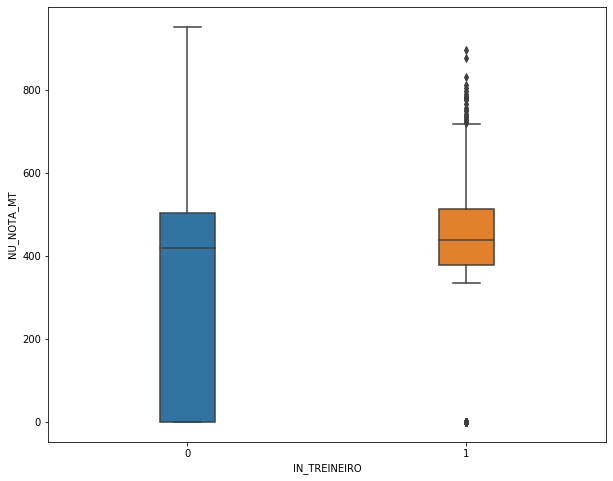

In [42]:
ax = sns.boxplot(x=df.IN_TREINEIRO, y=df.NU_NOTA_MT,orient='v',width=0.2)


Text(0.5, 1.0, 'Nota de ciências naturais dos treineiros de 2016')

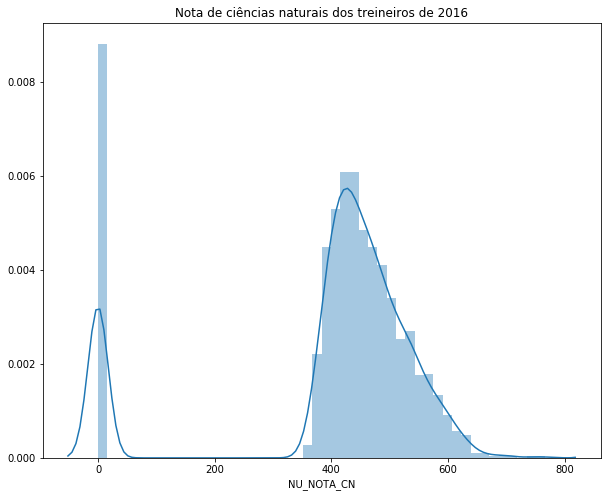

In [43]:
sns.distplot(df[df['IN_TREINEIRO']==1]['NU_NOTA_CN'])
plt.title('Nota de ciências naturais dos treineiros de 2016')

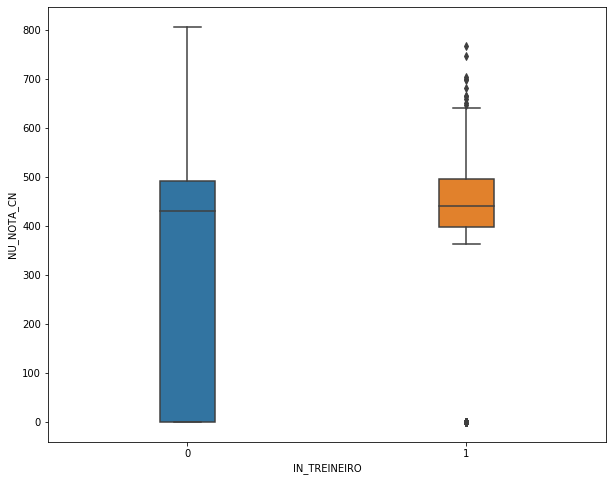

In [44]:
ax = sns.boxplot(x=df.IN_TREINEIRO, y=df.NU_NOTA_CN,orient='v',width=0.2)


Text(0.5, 1.0, 'Nota de ciências humanas dos treineiros de 2016')

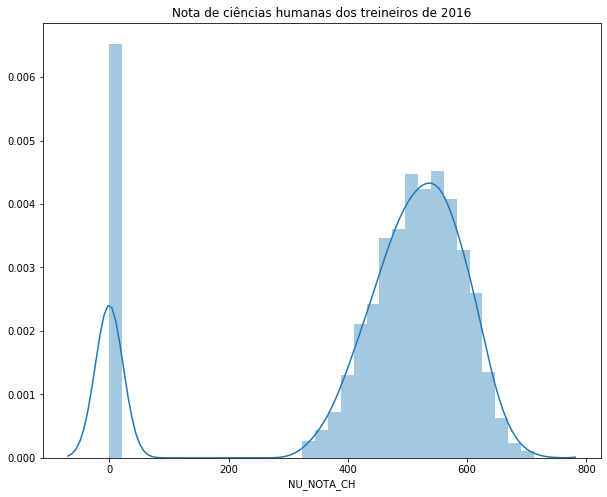

In [45]:
sns.distplot(df[df['IN_TREINEIRO']==1]['NU_NOTA_CH'])
plt.title('Nota de ciências humanas dos treineiros de 2016')

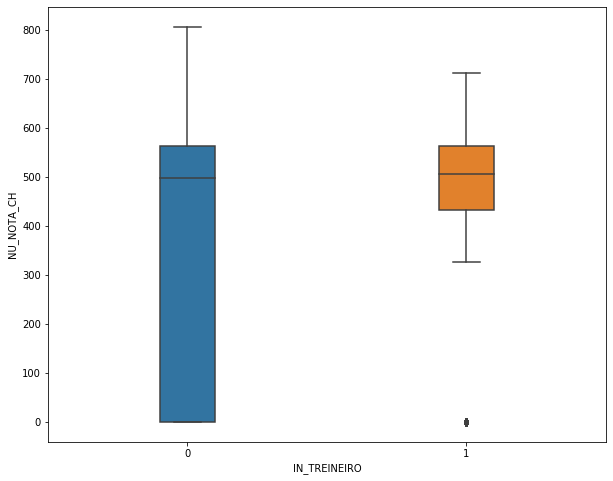

In [46]:
ax = sns.boxplot(x=df.IN_TREINEIRO, y=df.NU_NOTA_CH,orient='v',width=0.2)


Podemos chegar nas seguintes conclusões:
* Grande parte dos treineiros são mulheres, 
* Grande parte é do estados do Ceará
* Todos irão concluir o ensino médio depois de 2016, ou seja, são adolescentes que estão cursando o 1 ou 2 ano do ensino médio
* Grande parte dos treineiros tem 16 ou 17 anos e são solteiras
* Muitos escolheram espanhol como a lingua estrangeira para a prova
* Mesmo tendo uma quantidade baixa de treineiros, grande parte deles tiraram notas bem altas 

In [47]:
df.TP_ENSINO.unique()

array([1, 0, 3, 2])

In [183]:
# df_new = df[['NU_NOTA_MT','TP_ESCOLA','TP_PRESENCA_CN', 'TX_GABARITO_MT','TX_RESPOSTAS_MT','NU_IDADE','TP_ST_CONCLUSAO'
#              ,'TP_ANO_CONCLUIU', 'TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC'
#              ,'IN_SEM_RECURSO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_REDACAO'
#              ,'Q035','Q036','Q037','Q038','Q040','Q041']]
df_new = df[['IN_TREINEIRO','TP_ESCOLA', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC',
       'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'NU_NOTA_COMP1']]
df_new.head()



IN_TREINEIRO  TP_ESCOLA  TP_PRESENCA_CH  TP_PRESENCA_CN  TP_PRESENCA_LC  \
0             0          1               1               1               1   
1             0          2               1               1               1   
2             0          1               0               0               0   
3             0          1               0               0               0   
4             0          1               0               0               0   

   NU_IDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  NU_NOTA_CN  NU_NOTA_CH  \
0        24                1                4       436.3       495.4   
1        17                2                0       474.5       544.1   
2        21                3                0         0.0         0.0   
3        25                1                9         0.0         0.0   
4        28                1                4         0.0         0.0   

   NU_NOTA_LC  TP_STATUS_REDACAO  NU_NOTA_REDACAO  NU_NOTA_COMP1  
0       581.2                  1            520.0          120.0  
1       599.0                  1            580.0          140.0  
2         0.0                  0              0.0            0.0  
3         0.0                  0              0.0            0.0  
4         0.0                  0              0.0            0.0

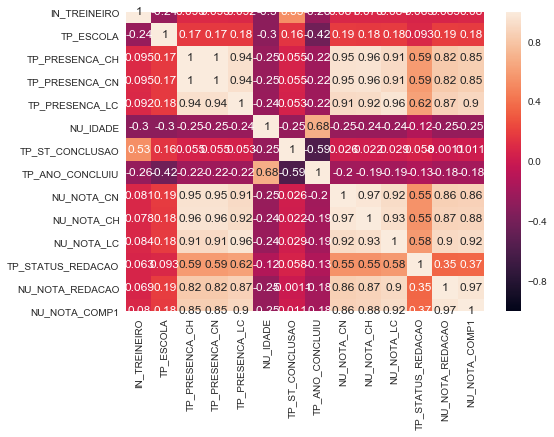

In [184]:
sns.heatmap(df_new.corr(),annot=True,vmin=-1,vmax=1)

In [185]:
df_new.select_dtypes(['object']).columns

Index([], dtype='object')

In [186]:
df_new = df_new.fillna(value=0)
df_test = df_test.fillna(value=0)
df_new.isnull().values.any()


False

In [187]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 14 columns):
IN_TREINEIRO         13730 non-null int64
TP_ESCOLA            13730 non-null int64
TP_PRESENCA_CH       13730 non-null int64
TP_PRESENCA_CN       13730 non-null int64
TP_PRESENCA_LC       13730 non-null int64
NU_IDADE             13730 non-null int64
TP_ST_CONCLUSAO      13730 non-null int64
TP_ANO_CONCLUIU      13730 non-null int64
NU_NOTA_CN           13730 non-null float64
NU_NOTA_CH           13730 non-null float64
NU_NOTA_LC           13730 non-null float64
TP_STATUS_REDACAO    13730 non-null int64
NU_NOTA_REDACAO      13730 non-null float64
NU_NOTA_COMP1        13730 non-null float64
dtypes: float64(5), int64(9)
memory usage: 1.5 MB


In [188]:
df_new.iloc[:,1:-1]

TP_ESCOLA  TP_PRESENCA_CH  TP_PRESENCA_CN  TP_PRESENCA_LC  NU_IDADE  \
0              1               1               1               1        24   
1              2               1               1               1        17   
2              1               0               0               0        21   
3              1               0               0               0        25   
4              1               0               0               0        28   
...          ...             ...             ...             ...       ...   
13725          1               1               1               1        20   
13726          1               1               1               1        33   
13727          1               1               1               1        15   
13728          1               1               1               1        36   
13729          2               1               1               1        17   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
0                    1                4       436.3       495.4       581.2   
1                    2                0       474.5       544.1       599.0   
2                    3                0         0.0         0.0         0.0   
3                    1                9         0.0         0.0         0.0   
4                    1                4         0.0         0.0         0.0   
...                ...              ...         ...         ...         ...   
13725                1                3       438.2       419.7       394.5   
13726                1               10       423.8       557.9       533.0   
13727                3                0       460.5       528.9       569.3   
13728                4                0       422.5       621.7       569.0   
13729                2                0       488.7       575.3       565.9   

       TP_STATUS_REDACAO  NU_NOTA_REDACAO  
0                      1            520.0  
1                      1            580.0  
2                      0              0.0  
3                      0              0.0  
4                      0              0.0  
...                  ...              ...  
13725                  1            440.0  
13726                  1            560.0  
13727                  1            600.0  
13728                  1            460.0  
13729                  1            520.0  

[13730 rows x 12 columns]

In [189]:
df_new.columns

Index(['IN_TREINEIRO', 'TP_ESCOLA', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN',
       'TP_PRESENCA_LC', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'NU_NOTA_COMP1'],
      dtype='object')

## Tratando o problema de classe desbalanceada

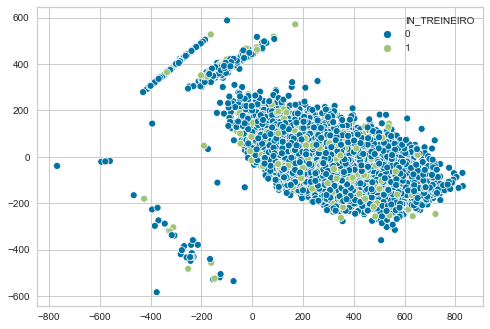

In [190]:
pca = PCA(n_components=2)

pca.fit(df_new.drop(["IN_TREINEIRO"], axis=1))

imbalanced_pca = pca.transform(df_new.drop(["IN_TREINEIRO"], axis=1))
sns.scatterplot(imbalanced_pca[:, 0], imbalanced_pca[:, 1], hue=df_new.IN_TREINEIRO);


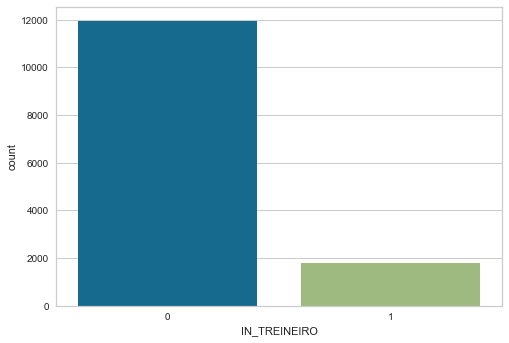

In [191]:
sns.countplot(df_new.IN_TREINEIRO)

In [192]:
smote = SMOTE(sampling_strategy="minority")
X = np.array(df_new.loc[:, df_new.columns != 'IN_TREINEIRO'])

X_smote, y_smote = smote.fit_resample(X, df_new.IN_TREINEIRO)


In [193]:
data_smote = pd.DataFrame(data=X_smote,columns=['TP_ESCOLA', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC',
       'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'NU_NOTA_COMP1'])

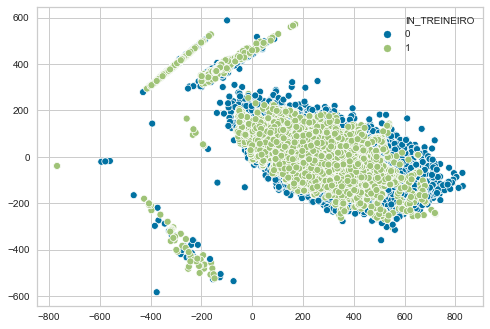

In [194]:
imbalanced_pca_smote = pca.transform(X_smote)
sns.scatterplot(x=imbalanced_pca_smote[:, 0], y=imbalanced_pca_smote[:, 1], hue=y_smote);


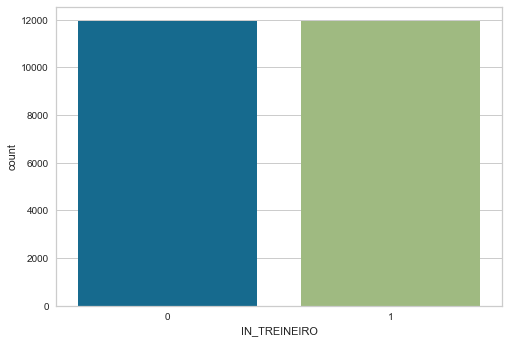

In [195]:
sns.countplot(y_smote)

In [196]:
X_smote

array([[  1.        ,   1.        ,   1.        , ...,   1.        ,
        520.        , 120.        ],
       [  2.        ,   1.        ,   1.        , ...,   1.        ,
        580.        , 140.        ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  1.        ,   1.        ,   1.        , ...,   1.        ,
        704.31163071, 135.68836929],
       [  1.        ,   1.        ,   1.        , ...,   1.        ,
        440.        , 120.        ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

## Feature Selection

Eliminação recursiva de atributos: De acordo com Matt Harrison, esse método removerá os atributos mais fracos, e então fará a adequação de um modelo.


2020-06-05 18:44:45,070 [22348] WARNING  py.warnings:110: [JupyterRequire] /Users/lauradamacenodealmeida/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)

2020-06-05 18:44:45,074 [22348] WARNING  py.warnings:110: [JupyterRequire] /Users/lauradamacenodealmeida/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)



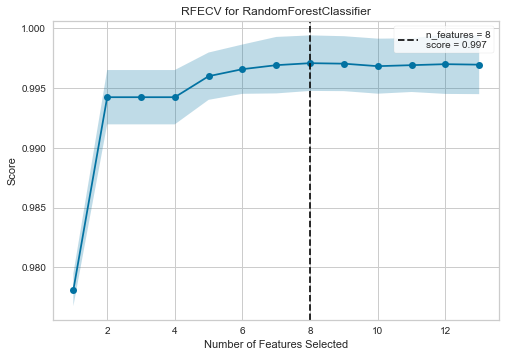

In [197]:
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(5)

visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='accuracy')
visualizer.fit(X_smote, y_smote)        # Fit the data to the visualizer

visualizer.show()           # Finalize and render the figure


In [198]:
visualizer.support_

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True])

In [199]:
df_new.loc[:, df_new.columns != 'IN_TREINEIRO'].columns[visualizer.support_]

Index(['TP_ESCOLA', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1'],
      dtype='object')

In [200]:
def matriz_confusao(real, predito):
    matriz = metrics.confusion_matrix(real,predito)
    fig, ax = plt.subplots()
    classes = df['IN_TREINEIRO'].unique()
    im = ax.imshow(matriz,cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(matriz.shape[1]),
           yticks=np.arange(matriz.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusão',
           ylabel='True label',
           xlabel='Predicted label')
    thresh = matriz.max().mean()
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            ax.text(j, i, format(matriz[i, j]),
                ha="center", va="center",
                color="white" if matriz[i, j] > thresh else "black")
    fig.tight_layout()
    

## Criando modelos de classificação

In [201]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [202]:
colunas = data_smote[['TP_ESCOLA', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1']].columns

In [203]:
X = data_smote[['TP_ESCOLA', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1']]

X_train, X_test, y_train, y_test = train_test_split(X, y_smote, test_size=0.3, random_state=2811)

In [204]:
X_train.shape

(16725, 8)

Árvore de decisão

In [205]:
from sklearn.tree import DecisionTreeClassifier


In [206]:
arvore = DecisionTreeClassifier(criterion="entropy")

In [207]:
arvore.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [208]:
arvore.score(X_train,y_train)

0.9979073243647235

In [209]:
predTree = arvore.predict(X_test)

In [210]:
print("Recall do modelo: ",metrics.recall_score(y_test, predTree,average=None)*100)

Recall do modelo:  [99.4893617  99.86278814]


In [211]:
print('F1 score: ',metrics.f1_score(y_test, predTree,average=None))

F1 score:  [0.99673156 0.99684975]


In [212]:
print('Report da classificação: ', metrics.classification_report(y_test,predTree))


Report da classificação:                precision    recall  f1-score   support

           0       1.00      0.99      1.00      3525
           1       1.00      1.00      1.00      3644

    accuracy                           1.00      7169
   macro avg       1.00      1.00      1.00      7169
weighted avg       1.00      1.00      1.00      7169



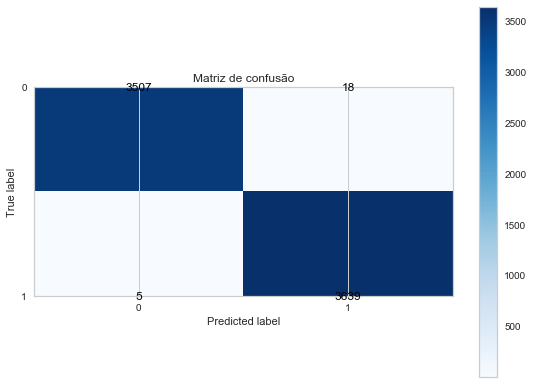

In [213]:
matriz_confusao(y_test,predTree)

In [214]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree


In [215]:
target = df.IN_TREINEIRO.astype(str)
tree.export_graphviz(arvore,out_file='arvore.dot',
                feature_names = colunas,
                class_names=target.unique())

In [216]:
!dot -Tpng arvore.dot -o arvore.png -Gdpi=600


In [217]:
from IPython.display import Image
Image(filename = 'arvore.png')

Random Forest

In [218]:
X_train.shape

(16725, 8)

In [219]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [220]:
rfc_predict = rfc.predict(X_test)


In [221]:
print("Recall do modelo: ",metrics.recall_score(y_test, rfc_predict,average=None)*100)

Recall do modelo:  [99.74468085 99.83534577]


In [222]:
print('F1 score: ',metrics.f1_score(y_test, rfc_predict,average=None))

F1 score:  [0.99787143 0.99794267]


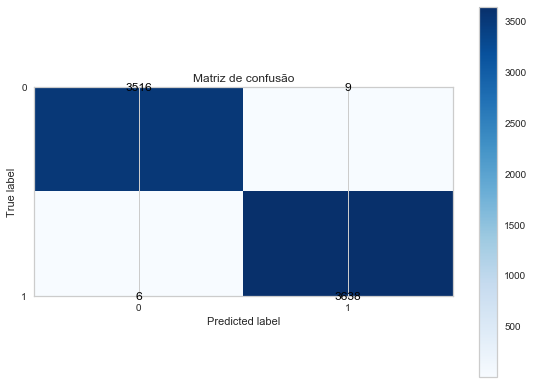

In [223]:
matriz_confusao(y_test,rfc_predict)

KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [226]:
predict_knn = neigh.predict(X_test)


In [227]:
print("Acurácia do modelo: ",metrics.accuracy_score(y_test, predict_knn)*100)

Acurácia do modelo:  81.42000278978936


In [228]:
print("Recall do modelo: ",metrics.recall_score(y_test, predict_knn,average=None)*100)

Recall do modelo:  [71.46099291 91.05378705]


In [229]:
print('F1 score: ',metrics.f1_score(y_test, predict_knn,average=None))

F1 score:  [0.79089482 0.83283133]


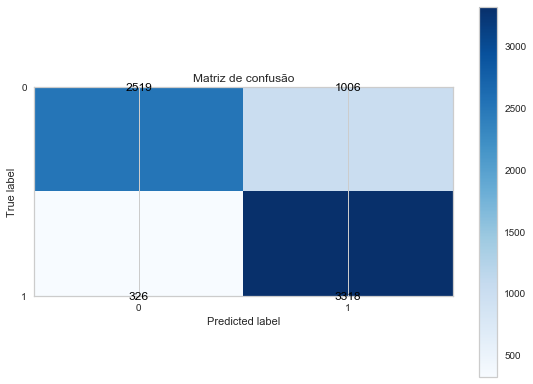

In [230]:
matriz_confusao(y_test,predict_knn)

In [231]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

2020-06-05 18:54:29,835 [22348] WARNING  py.warnings:110: [JupyterRequire] /Users/lauradamacenodealmeida/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



LogisticRegression()

In [232]:
y_pred = logreg.predict(X_test)
print("Acurácia do modelo: ",metrics.accuracy_score(y_test, y_pred)*100)

Acurácia do modelo:  98.50746268656717


In [233]:
print("Recall do modelo: ",metrics.recall_score(y_test, y_pred,average=None)*100)

Recall do modelo:  [ 96.96453901 100.        ]


In [234]:
print('F1 score: ',metrics.f1_score(y_test, y_pred,average=None))

F1 score:  [0.98458879 0.98553076]


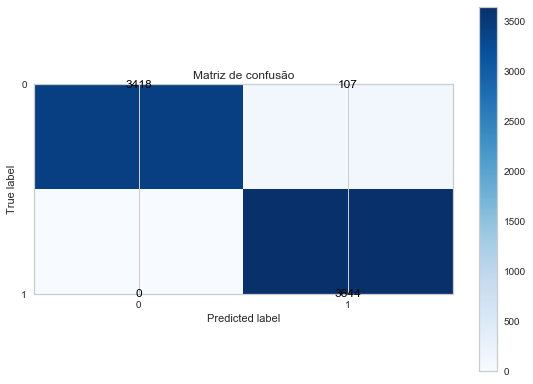

In [235]:
matriz_confusao(y_test,y_pred)

## Testando o modelo com os valores de test.csv

In [236]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [237]:
test = df_test[['TP_ESCOLA', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1']]

math_predict = rfc.predict(test)
df_test['IN_TREINEIRO'] = math_predict


In [238]:
math_predict

array([0, 0, 1, ..., 0, 0, 0])

In [239]:
df_test[['NU_INSCRICAO','IN_TREINEIRO']].to_csv('answer.csv', index=False)